# Linear model

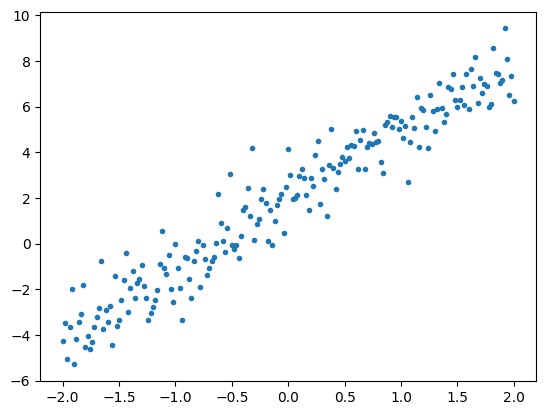

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201

# A vector of random x values
x = tf.linspace(-2, 2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
    return x * TRUE_W + TRUE_B

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = f(x) + noise

# Plot all the data
plt.plot(x, y, ".")
plt.show()

In [2]:
import tensorflow as tf

# Module: https://www.tensorflow.org/api_docs/python/tf/Module
class LinearModel(tf.Module):
    def __init__(self, **kwards):
        super().__init__(**kwards)
        # Initialize the weights to `5.0` and the bias to `0.0`
        # In practice, these should be randomly initialized
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.w * x + self.b


model = LinearModel()
# List the variables tf.modules's built-in variable aggregation
print("Weights and Biases:", model.variables)

# Verify the model works
assert model(3.0).numpy() == 15.0

Weights and Biases: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


In [ ]:
def loss(target_y, predicted_y): # середньоквадратична помилка
    return tf.reduce_mean(tf.square(target_y - predicted_y))


def train(model, x, y, learning_rate):
    # backpropagation
    with tf.GradientTape() as t:
        current_loss = loss(y, model(x))
        dw, db = t.gradient(current_loss, [model.w, model.b]) # беремо похідну. Нас цікавить наскільки зміниться похибка при зміні параметра
        model.w.assign_sub(learning_rate * dw)
        model.b.assign_sub(learning_rate * db)

def training_loop(model, x, y):
    for epoch in range(10):
        train(model, x, y, learning_rate=0.1)
        current_loss = loss(y, model(x))
        print(f"loss: {current_loss}")

In [6]:
linear_model = LinearModel()
training_loop(linear_model, x, y)

loss: 6.14613676071167
loss: 3.9485106468200684
loss: 2.682084083557129
loss: 1.9463428258895874
loss: 1.5153870582580566
loss: 1.2608866691589355
loss: 1.1093841791152954
loss: 1.0184967517852783
loss: 0.9635715484619141
loss: 0.9301508665084839


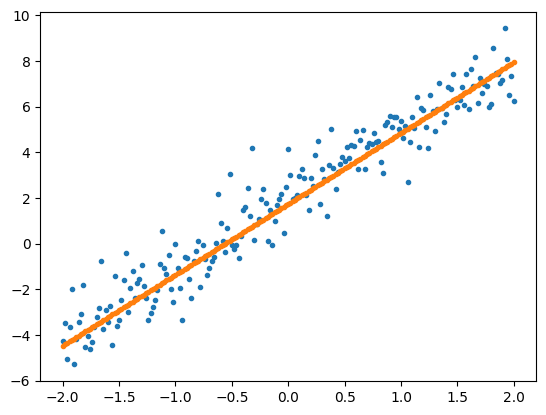

In [7]:
y_pred = linear_model(x)

# plot all the data
plt.plot(x, y, ".")
plt.plot(x, y_pred, ".")
plt.show()